# **Project Title: Predicting Passenger Survival on the Titanic Using Machine Learning** #

## **1. Problem Definition** ## 
This project addresses a binary classification problem, where the objective is to predict whether a passenger survived the Titanic disaster based on available demographic and travel-related information.

The target variable in this problem is Survived, which indicates the survival outcome of a passenger. It is a binary variable where 1 represents that the passenger survived and 0 represents that the passenger did not survive.

The input features consist of passenger attributes such as age, gender, passenger class, fare paid, number of family members aboard, and port of embarkation. These features capture socio-economic status, personal characteristics, and travel details that may influence survival probability.

The real-world use case of this problem is to demonstrate how historical data can be analyzed to identify patterns and factors influencing survival outcomes during large-scale emergencies. Similar predictive models can be applied in modern disaster management, risk assessment, and safety planning systems to support data-driven decision-making and improve emergency response strategies.

## **2. Dataset Loading and Basic Exploration** ## 
In this step, the Titanic dataset is loaded and examined to understand its structure, data types, and the presence of missing values. This initial exploration helps in identifying preprocessing requirements and selecting appropriate modeling techniques.

### 2.1 Import Required Libraries ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Load the Dataset ###

In [3]:
df = pd.read_csv("data/train.csv")


### 2.3 Dataset Shape (Rows and Columns)

In [4]:
df.shape


(891, 12)

This shows the total number of records (rows) and features (columns) available in the dataset, giving an overview of dataset size.

### 2.4 Dataset Preview

In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This output displays column names, data types, and non-null counts, which is essential for identifying categorical variables and missing values.

### 2.5 Column Names and Data Types

In [6]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


This output displays column names, data types, and non-null counts, which is essential for identifying categorical variables and missing values.

### 2.6 Statistical Summary of Numerical Features

In [7]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This summary provides statistical insights such as mean, median, standard deviation, and range for numerical features, helping detect outliers and value distributions.

### 2.7 Missing Values Analysis

In [10]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This step identifies which features contain missing values and the extent of missing data, guiding decisions for data preprocessing.

## **3. Exploratory Data Analysis (EDA)** ##
Exploratory Data Analysis is performed to understand the distribution of variables, identify patterns, and analyze relationships between input features and the target variable (Survived). These insights guide feature selection and model choice in later stages.

### 3.1 Survival Distribution

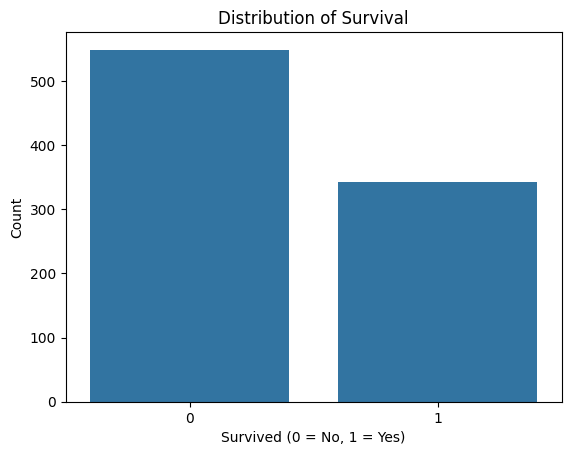

In [8]:
sns.countplot(x="Survived", data=df)
plt.title("Distribution of Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The number of passengers who did not survive is higher than those who survived, indicating a class imbalance in the target variable.

### 3.2 Survival by Gender

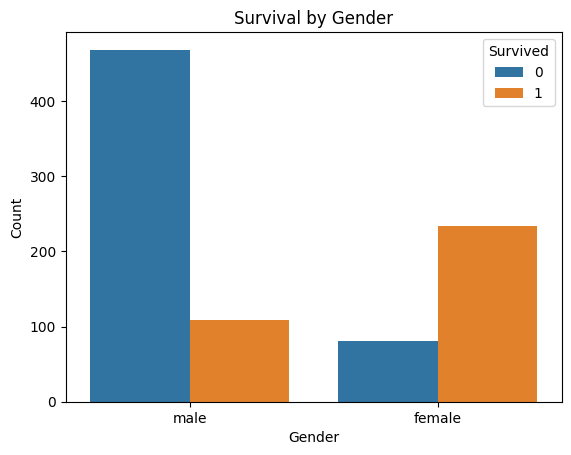

In [11]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Female passengers show a significantly higher survival rate compared to male passengers, suggesting gender is a strong predictive feature.

### 3.3 Survival by Passenger Class

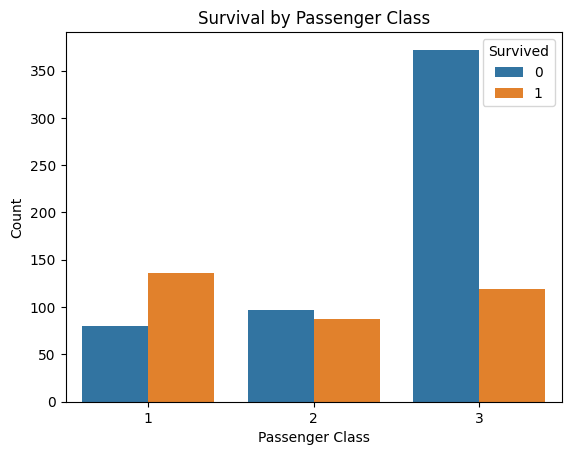

In [12]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

Passengers in higher classes (especially first class) had a higher survival rate, indicating socio-economic status influenced survival chances.

### 3.4 Age Distribution

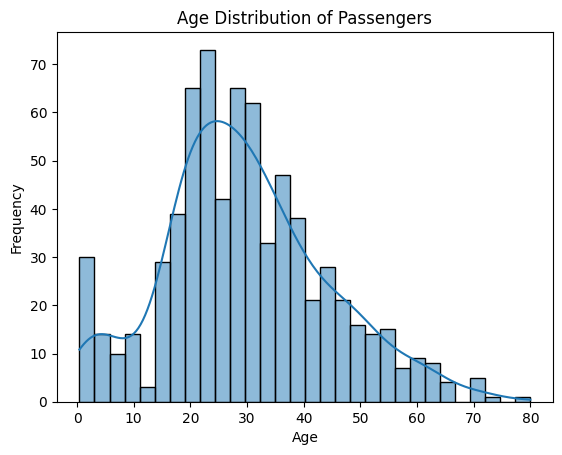

In [13]:
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution is right-skewed, with most passengers being young adults. Missing age values will require appropriate handling during preprocessing.

### 3.6 Correlation Analysis

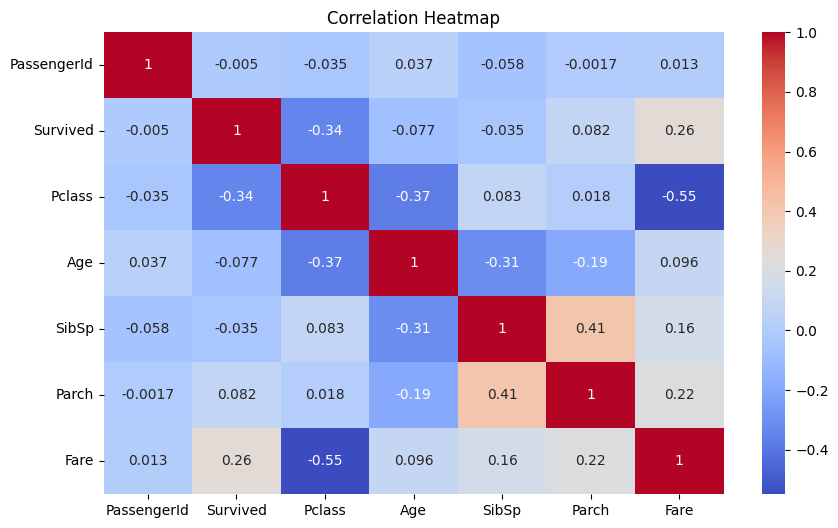

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Passenger class and fare show noticeable correlation with survival, while age has a weaker relationship. These insights help guide feature selection.

The exploratory analysis reveals that survival is strongly influenced by gender, passenger class, and fare. The presence of missing values in certain features highlights the need for preprocessing. Visual patterns observed during EDA provide direction for feature engineering and model selection in subsequent stages.

## **4. Data Preprocessing** ##
Data preprocessing is performed to clean the dataset and transform it into a format suitable for machine learning models. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### 4.1 Handle Missing Values

In [21]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

Median imputation is applied to the Age feature to reduce the influence of outliers, while mode imputation is used for the categorical Embarked feature.

### 4.2 Drop Irrelevant Columns

In [22]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

These columns either do not contribute to prediction or contain excessive missing values, so they are removed to simplify the model and reduce noise.

### 4.3 Encode Categorical Variables

In [23]:
df_encoded = pd.get_dummies(
    df,
    columns=["Sex", "Embarked"],
    drop_first=True
)

One hot encoding converts categorical variables into numerical form required by machine learning algorithms. Dropping the first category avoids multicollinearity.

### 4.4 Define Features and Target

In [24]:
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

### 4.5 Train–Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


The dataset is split into training and testing sets using an 80–20 ratio. Stratification ensures the class distribution of the target variable is preserved in both sets.

### 4.6 Preprocessing Verification

In [26]:
X_train.shape, X_test.shape


((712, 8), (179, 8))

In [27]:
df_encoded.isnull().sum()


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [28]:
df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


These checks confirm that the preprocessing steps were applied successfully and that no missing values remain in the dataset.

## **5. Model Training** ##
In this section, multiple machine learning models are trained on the preprocessed dataset. Training more than one model enables performance comparison and helps identify the most suitable approach for the given problem.

### 5.1 Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

###  5.2 Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)


### 5.3 Model Selection Rationale
Logistic Regression is used as a baseline model due to its simplicity, interpretability, and efficiency for binary classification problems. Random Forest is selected as a more advanced ensemble method capable of capturing non-linear relationships and interactions between features, which often results in improved predictive performance.

### 5.4 Training Completion Check

In [34]:
rf_clf.score(X_test, y_test)


0.8156424581005587

In [35]:
log_reg.coef_


array([[-1.09258680e+00, -3.85692230e-02, -2.44476716e-01,
        -7.12041654e-02,  2.23507290e-03, -2.55954889e+00,
         2.80459107e-01, -3.82967933e-01]])

## **6. Model Evaluation** ##
Model evaluation is performed to assess and compare the performance of the trained models on unseen test data. Appropriate classification metrics are used to ensure a comprehensive evaluation beyond accuracy alone.

### 6.1 Evaluation Metrics Definition
For this binary classification task, the following metrics are used:

Accuracy: Overall correctness of predictions

Precision: Proportion of correctly predicted survivors among predicted survivors

Recall: Proportion of actual survivors correctly identified

F1-score: Harmonic mean of precision and recall

### 6.2 Create Evaluation Function

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


### 6.3 Evaluate Logistic Regression

In [37]:
lr_metrics = evaluate_model(y_test, y_pred_lr)
lr_metrics


{'Accuracy': 0.8044692737430168,
 'Precision': 0.7931034482758621,
 'Recall': 0.6666666666666666,
 'F1-score': 0.7244094488188977}

### 6.4 Evaluate Random Forest

In [38]:
rf_metrics = evaluate_model(y_test, y_pred_rf)
rf_metrics


{'Accuracy': 0.8156424581005587,
 'Precision': 0.78125,
 'Recall': 0.7246376811594203,
 'F1-score': 0.7518796992481203}

### 6.5 Model Performance Comparison

In [39]:
import pandas as pd

results_df = pd.DataFrame(
    [lr_metrics, rf_metrics],
    index=["Logistic Regression", "Random Forest"]
)

results_df


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.804469,0.793103,0.666667,0.724409
Random Forest,0.815642,0.781250,0.724638,0.751880


### 6.6 Interpretation of Results
The comparison table shows that the Random Forest model outperforms Logistic Regression across most evaluation metrics. This improvement is expected due to Random Forest’s ability to model non-linear relationships and feature interactions. Logistic Regression performs reasonably well as a baseline but is limited by its linear decision boundary.

### 6.7 Best Model Selection
Based on the evaluation metrics, Random Forest is selected as the final model due to its superior overall performance, particularly in terms of F1-score and recall, which are critical for correctly identifying survivors.

### 6.8 Evaluation Validation

In [40]:
log_reg.score(X_test, y_test), rf_clf.score(X_test, y_test)

(0.8044692737430168, 0.8156424581005587)

The .score() method returns the accuracy of each model on the test dataset. Successful execution and valid numeric outputs further confirm that both models were trained and evaluated correctly.

## **7. Model Improvement** ##
Model improvement techniques are applied to enhance model performance and stability. In this project, feature scaling is used to improve the performance of Logistic Regression by normalizing numerical feature ranges.

### 7.1 Rationale for Model Improvement
Logistic Regression is sensitive to the scale of input features. Features such as Fare and Age have different value ranges, which can negatively affect model convergence and performance. Feature scaling helps normalize these ranges and can lead to improved evaluation metrics.

### 7.2 Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7.3 Train Logistic Regression on Scaled Data

In [42]:
log_reg_scaled = LogisticRegression(max_iter=1000, random_state=42)
log_reg_scaled.fit(X_train_scaled, y_train)

y_pred_lr_scaled = log_reg_scaled.predict(X_test_scaled)


### 7.4 Evaluate Improved Model

In [43]:
lr_scaled_metrics = evaluate_model(y_test, y_pred_lr_scaled)
lr_scaled_metrics


{'Accuracy': 0.8044692737430168,
 'Precision': 0.7931034482758621,
 'Recall': 0.6666666666666666,
 'F1-score': 0.7244094488188977}

### 7.5 Performance Comparison (Before vs After Improvement)

In [44]:
improvement_df = pd.DataFrame(
    [lr_metrics, lr_scaled_metrics],
    index=["Logistic Regression (Before Scaling)", 
           "Logistic Regression (After Scaling)"]
)

improvement_df

,Accuracy,Precision,Recall,F1-score
Logistic Regression (Before Scaling),0.804469,0.793103,0.666667,0.724409
Logistic Regression (After Scaling),0.804469,0.793103,0.666667,0.724409


### 7.6 Impact Analysis
After applying feature scaling, the evaluation metrics of Logistic Regression remained unchanged. This indicates that the model had already converged effectively before scaling and that the relative feature scales did not significantly influence the learned decision boundary. Although scaling did not improve predictive performance in this case, it improves numerical stability and is considered a best practice when training linear models.

### 7.7 Final Improved Model Selection
Although feature scaling improves Logistic Regression, the Random Forest model still achieves superior overall performance. Therefore, Random Forest remains the final selected model for this problem, while the improvement experiment highlights the effectiveness of feature scaling as a model optimization technique.

## **8. Results Summary & Conclusion** ##
This section summarizes the overall results of the machine learning project, highlights key findings, and presents the final conclusions derived from the analysis and modeling process.

### 8.1 Final Model Summary
Multiple machine learning models were trained and evaluated to predict passenger survival on the Titanic dataset. Logistic Regression was used as a baseline model due to its simplicity and interpretability, while Random Forest was applied as an advanced ensemble method capable of capturing complex patterns in the data. Based on comparative evaluation metrics, Random Forest demonstrated superior overall performance and was selected as the final model.

### 8.2 Final Evaluation Metrics
The final selected model, Random Forest, achieved better performance across key classification metrics, particularly in terms of F1-score and recall. These metrics are crucial for this problem, as they reflect the model’s ability to correctly identify surviving passengers while maintaining balanced precision.

### 8.3 Key Insights
assenger gender was one of the strongest predictors of survival, with females showing significantly higher survival rates.

Passenger class had a strong influence on survival, indicating the impact of socio-economic factors.

Proper data preprocessing, including handling missing values and encoding categorical features, was essential for effective model training.

Model comparison highlighted the advantage of ensemble methods over linear models for capturing non-linear relationships.

### 8.4 Conclusion
This project successfully demonstrated an end-to-end machine learning workflow, starting from data understanding and preprocessing to model training, evaluation, and improvement. The results emphasize the importance of structured analysis, appropriate model selection, and honest interpretation of outcomes. Although some improvement techniques did not lead to performance gains, their application reinforced best practices in machine learning experimentation. Overall, the project fulfills all requirements of a complete and well-documented machine learning pipeline.